In [1]:
from nozzle_design import *

Input nozzle data: 

Inlet Pressure:  2345.74669 kPa
Inlet Temperature:  2943.9565966726423 K
Thrust:  2189.07408 N
Discretization:  50 
 

Input cooling data: 

Channel Height:  0.5 mm
Channel Width:  0.5 mm
Number of channels:  60.0
Coolant mass flow:  0.3231408271406143 kg/s
Coolant Temperature:  298.15 K
Coolant Pressure:  4845.746689999999 kPa
Coolant Type:  Ethanol+Water
Coolant water fraction:  8.0 %
Wall conductivity:  401 W/mK
Wall thickness:  2.0 mm 
 

Nozzle design parameters: 

Throat diameter:  28.692412754464655 mm
Exit diameter:  58.714582083391754 mm
Epsilon:  4.187528815478138
Exit temperature:  1827.6551018145574 K
Exit Mach:  2.619810512957697
Exit velocity:  2250.2870194538013 m/s
Nozzle mass flow rate:  0.9727977191688821 kg/s
Specific Impulse (ISP):  229.3870560095618 s 
 

Coolant data: 

Coolant rho:  810.2166141115582
Coolant viscosity:  0.0007918872092873225
Coolant conductivity (k):  0.22624128663311502
Coolant Prandtl number (Pr):  9.780571736986014
Reynold

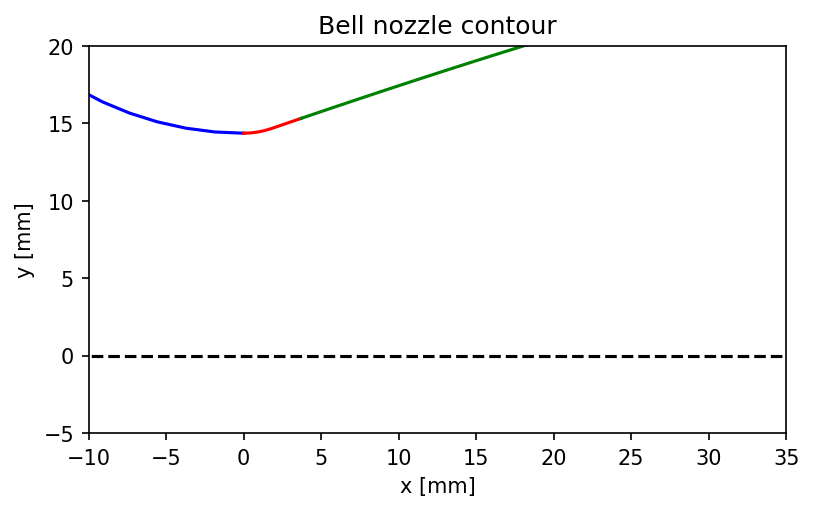

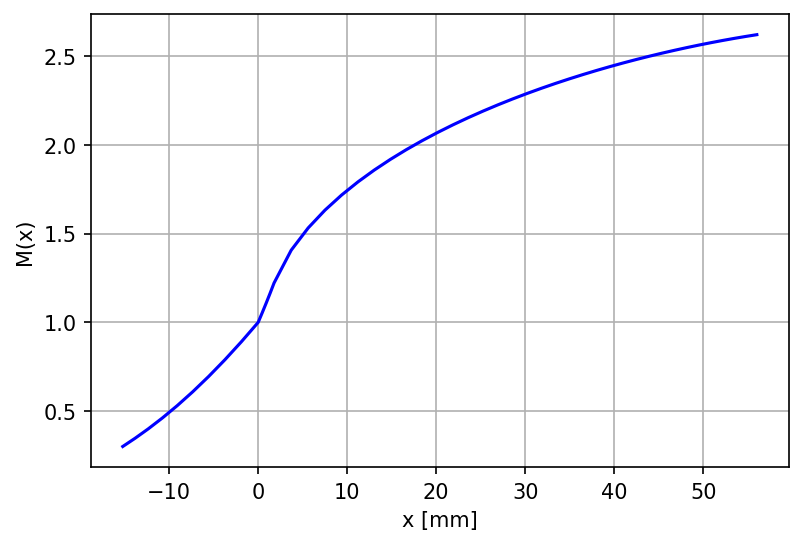

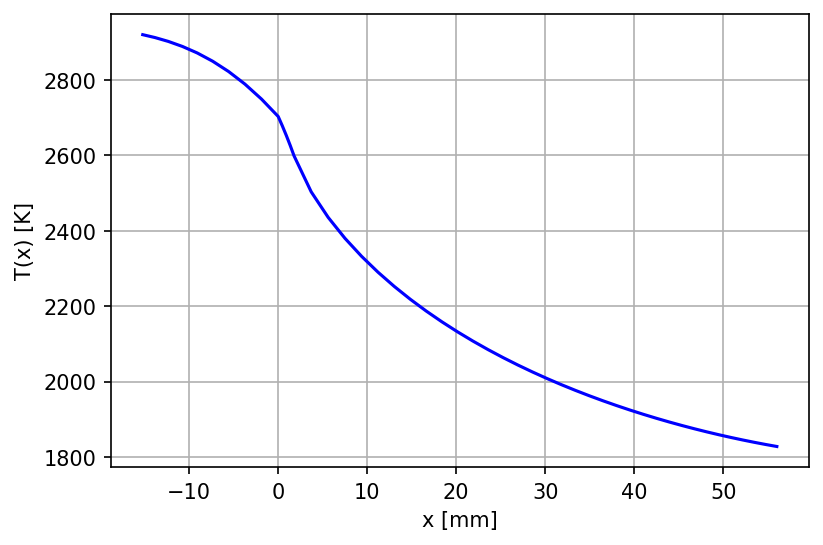

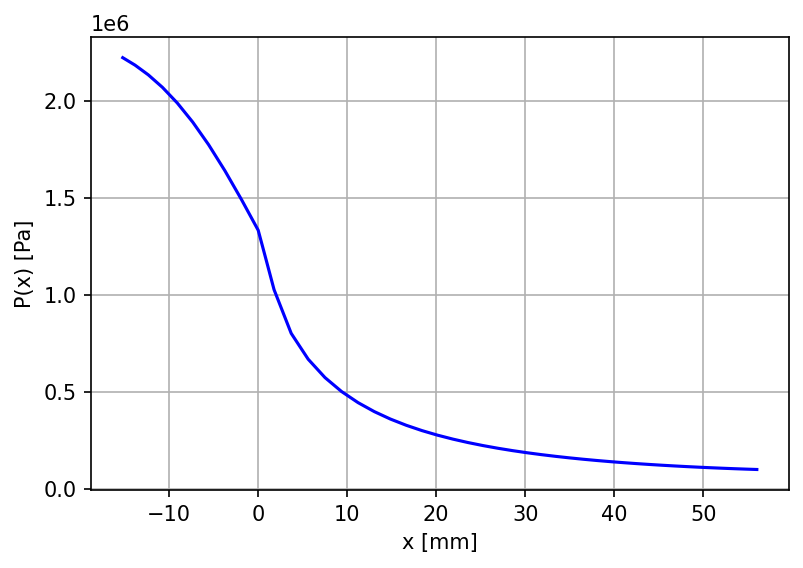

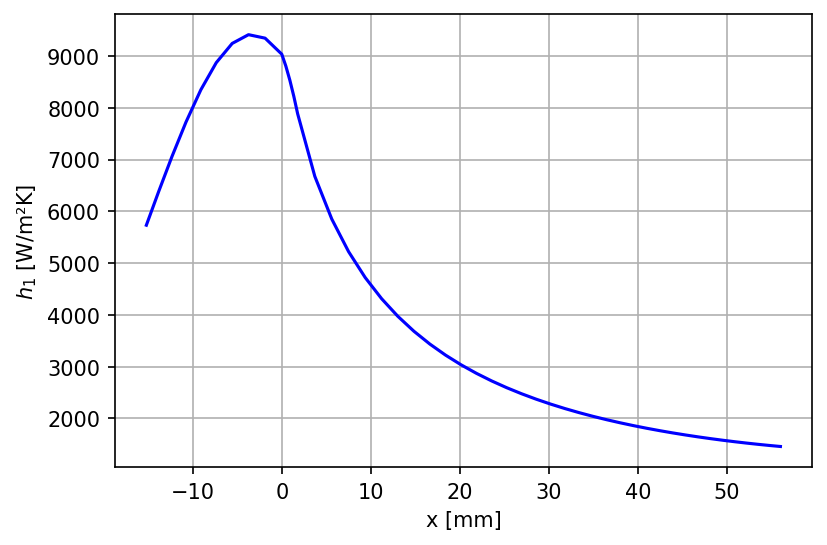

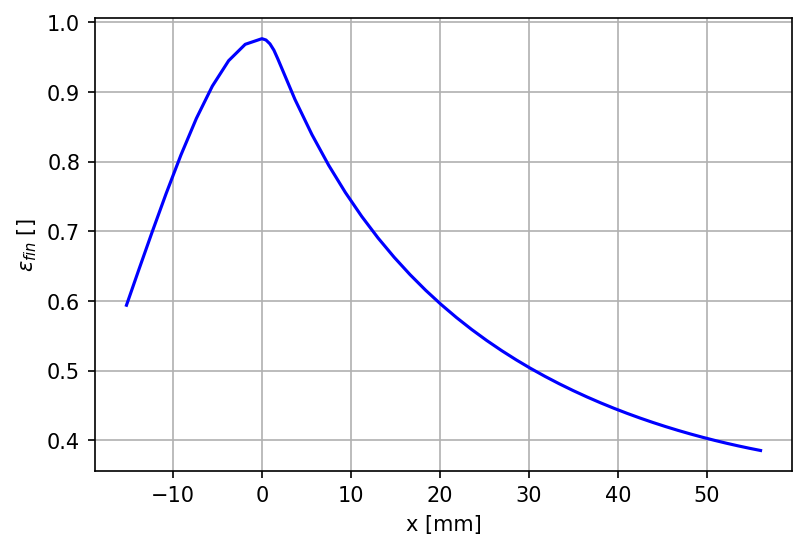

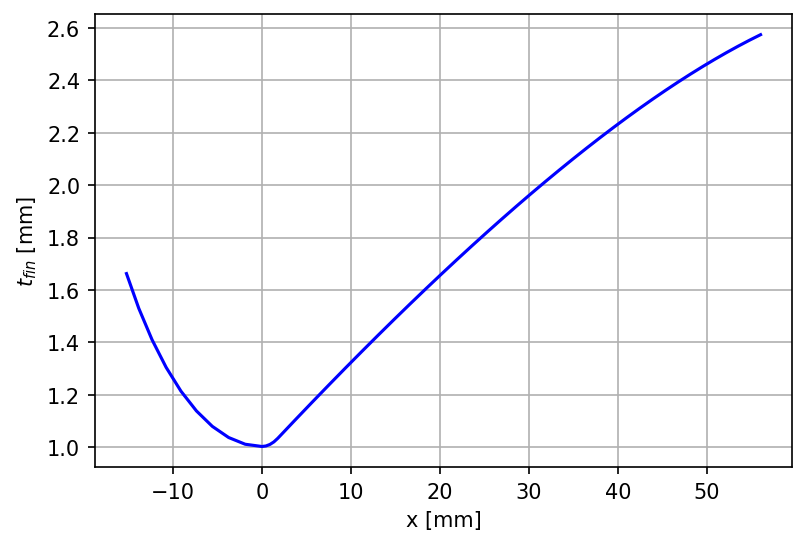

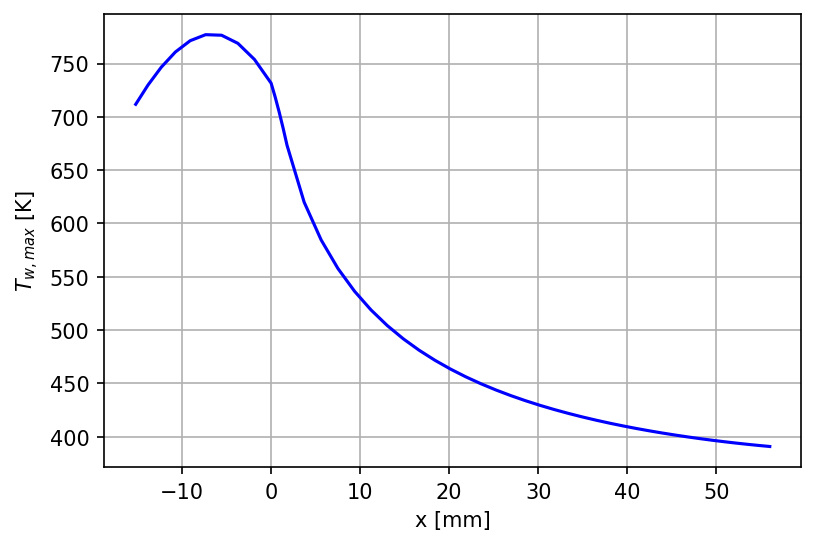

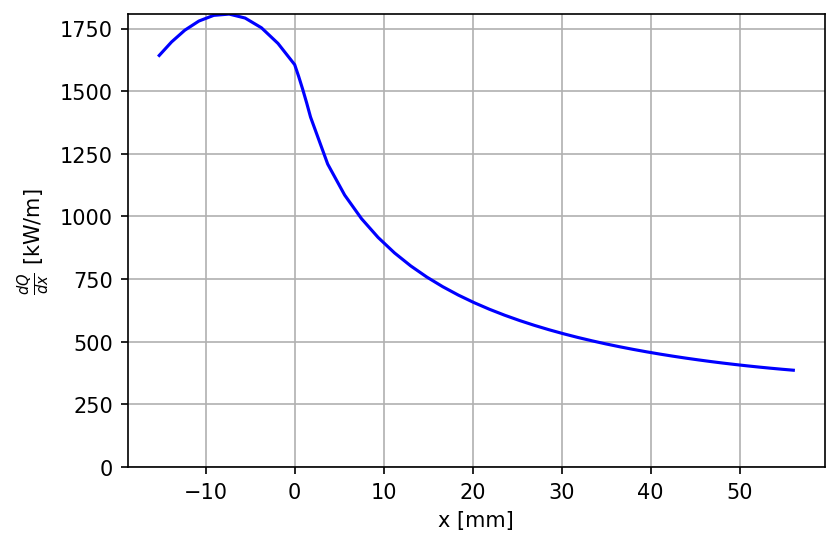

In [2]:
parameters = np.array([2.34574669e+06, 5.0e-04, 5.0e-04, 60, 8e-02, 1.5, 1.5, 2.18907408e+03])

inletPressure = parameters[0]
channelHeight = parameters[1]
channelWidth = parameters[2]
numberOfChannels = parameters[3]
coolantWaterFraction = parameters[4]
phi = parameters[5]
coolantExcess = parameters[6]
thrust = parameters[7]

exitPressure = 100000
gas = 'CombustionProducts'
k = 401
wallThickness = 2e-3
coolantType = 'Ethanol+Water'

x2 = round(coolantWaterFraction*100, 2)
x1 = 100 - x2
p_chamber = inletPressure/(10**5)
storage_pressure = inletPressure + 25e5

# Oxidizer
NOX =  Fluid(
    name='N2O', 
    coolprop_name='NitrousOxide', 
    formula=None, 
    fluid_type='oxidizer', 
    storage_temperature=298.15)

# Fuels
H2O = Fluid(
    name='H2O(L)', 
    coolprop_name='water', 
    formula='H 2 O 1', 
    fluid_type='fuel', 
    storage_pressure=storage_pressure,
    storage_temperature=298.15)

LC2H5OH = Fluid(
    name='C2H5OH(L)', 
    coolprop_name='ethanol', 
    formula='C 2 H 6 O 1', 
    fluid_type='fuel', 
    storage_pressure=storage_pressure, 
    storage_temperature=298.15)

H2O_C2H50H = FluidMixture(fluid1=LC2H5OH, x1=x1, fluid2=H2O, x2=x2)

NOELLE_motor = Motor(
    NOX,
    H2O_C2H50H,
    thrust = thrust,
    burn_time = 10,
    p_chamber = p_chamber,
    n_cstar = 1,
    n_cf = 1,
    cd_ox = 0.6,
    cd_fuel = 0.182,
    phi = phi
    )

inletTemperature = NOELLE_motor.To

NOELLE_Nozzle = Nozzle(
    inletPressure,
    inletTemperature,
    exitPressure,
    thrust,
    gas,
    motor=NOELLE_motor,
    n=50
    )

NOELLE_Nozzle.addCooling(
    channelHeight,
    channelWidth,
    numberOfChannels,
    coolantType,
    coolantWaterFraction,
    k,
    wallThickness,
    coolantExcess=coolantExcess,
    )

NOELLE_Nozzle.allInfo()